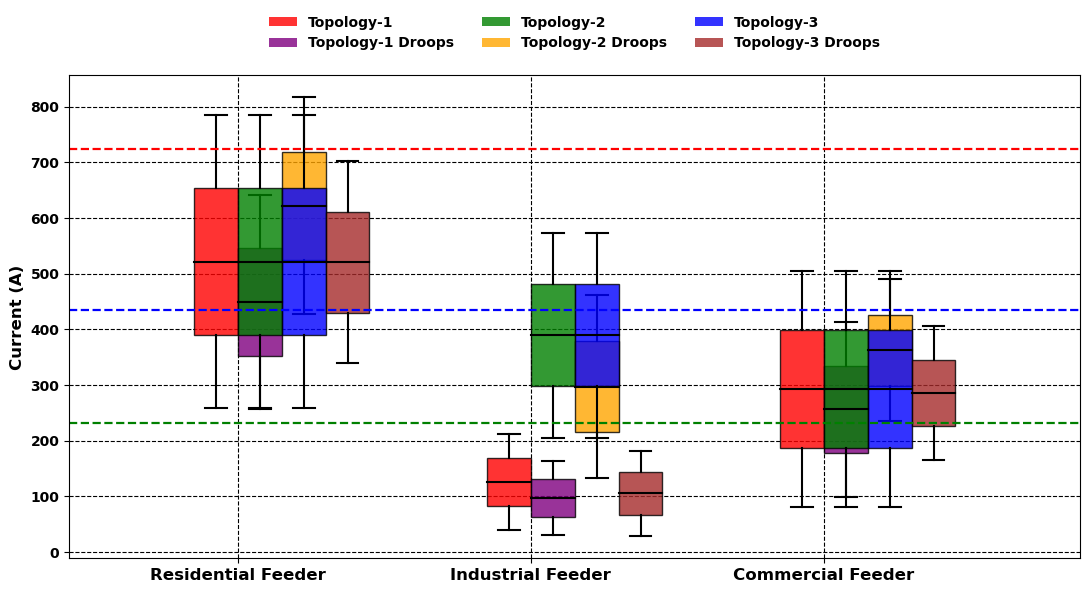

In [5]:
##### New plot 
## Box plotting of currents at each feeder for all topologies with/without Droop strategy of case-3
## Feeders: (Residential:res, Industrial:ind and Commercial:com)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Data Loading ---  to have the feeder name and the topologies
def load_data(feeder_type, topology, case, droop):
    droop_str = "_With_Droop" if droop else "_Without_Droop"
    filename = f'feeder_currents_{feeder_type}_Topology{topology}_case{case}{droop_str}.csv'
    try:
        df = pd.read_csv(filename)
        phase0_data = df[df['Phase'] == 0][['Min Current (A)', 'Max Current (A)']].values.T.flatten().tolist()
        return phase0_data
    except FileNotFoundError:
        print(f"Warning: File {filename} not found. Returning empty data.")
        return []

# --- Data Preparation ---
topologies = [1, 2, 3]
case = 3  ## Choose the load profile (case 1 or 3) Mustafa A. Kamoona
feeder_types = ['res', 'ind', 'com']
feeder_labels = {'res': 'Residential Feeder', 'ind': 'Industrial Feeder', 'com': 'Commercial Feeder'}
data_all = {}

for topology in topologies:
    topology_data = {}
    for feeder_type in feeder_types:
        topology_data[feeder_type] = [load_data(feeder_type, topology, case, droop=False),
                                      load_data(feeder_type, topology, case, droop=True)]
    data_all[f'Topology-{topology}'] = topology_data

# --- Plotting ---
fig, ax = plt.subplots(figsize=(11, 6))

x_labels = feeder_types
x_positions = np.arange(len(x_labels))
width = 0.15

topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

for i, feeder_type in enumerate(feeder_types):
    x_pos = x_positions[i]
    for j, topology in enumerate(topologies):
        droop_data_without = data_all[f'Topology-{topology}'][feeder_type][0]
        droop_data_with = data_all[f'Topology-{topology}'][feeder_type][1]

        positions_without = [x_pos - width/2 + j * width]
        positions_with = [x_pos + width/2 + j * width]

        box_without = ax.boxplot(droop_data_without, positions=positions_without, widths=width, patch_artist=True)
        box_with = ax.boxplot(droop_data_with, positions=positions_with, widths=width, patch_artist=True)

        color_without = topology_colors[f'Topology-{topology}']
        color_with = topology_colors[f'Topology-{topology}_Droops']

        plt.setp(box_without['boxes'], color='black', facecolor=color_without, alpha=0.8)
        plt.setp(box_with['boxes'], color='black', facecolor=color_with, alpha=0.8)
        plt.setp(box_without['medians'], color='black', linewidth=1.5)
        plt.setp(box_with['medians'], color='black', linewidth=1.5)
        plt.setp(box_without['caps'], color='black', linewidth=1.5)
        plt.setp(box_with['caps'], color='black', linewidth=1.5)
        plt.setp(box_without['whiskers'], color='black', linewidth=1.5)
        plt.setp(box_with['whiskers'], color='black', linewidth=1.5)
        plt.setp(box_without['fliers'], markeredgecolor='black', markeredgewidth=1.5)
        plt.setp(box_with['fliers'], markeredgecolor='black', markeredgewidth=1.5)

ax.set_xticks(x_positions)
ax.set_xticklabels([feeder_labels[ft] for ft in feeder_types], fontweight='bold', fontsize=12)
ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)

# Legend
legend_handles = []
legend_labels = []
for topology in topologies:
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, fc=topology_colors[f'Topology-{topology}'], alpha=0.8))
    legend_labels.append(f'Topology-{topology}')
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, fc=topology_colors[f'Topology-{topology}_Droops'], alpha=0.8))
    legend_labels.append(f'Topology-{topology} Droops')
ax.legend(legend_handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, prop={'weight': 'bold', 'size': 10})


ax.axhline(y=724, color='red', linestyle='--', linewidth=1.6) # Max Res Current (A) line
ax.axhline(y=434, color='blue', linestyle='--', linewidth=1.6) # Max Ind Current (A) line
ax.axhline(y=231, color='green', linestyle='--', linewidth=1.6) # Max Com Current (A) line

ax.grid(linestyle='--', color='black')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

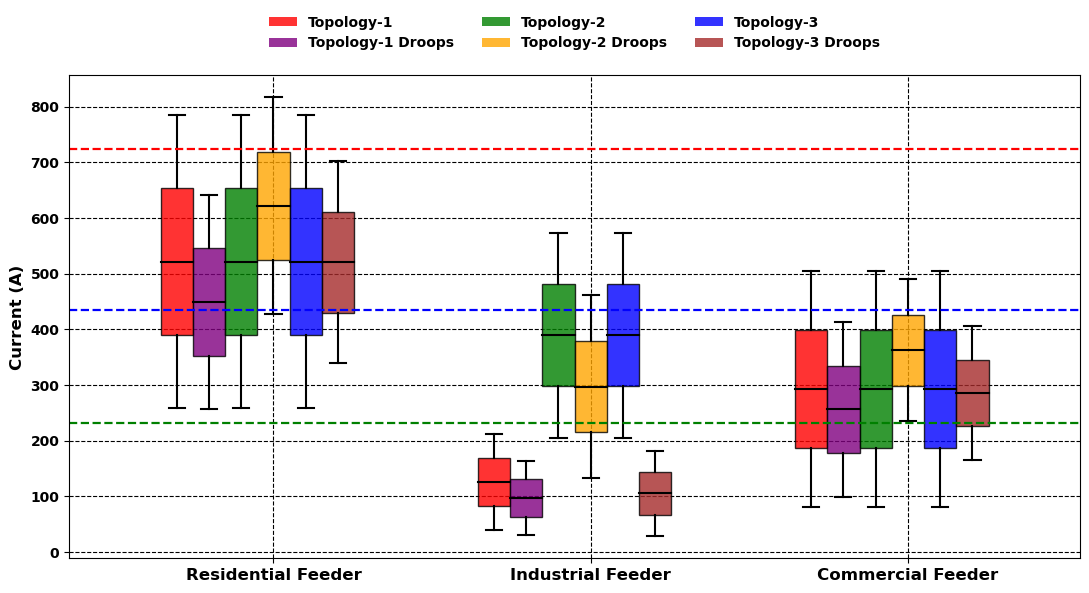

In [6]:
##### New plot, add space and separation
## Box plotting of currents at each feeder for all topologies with/without Droop strategy of case-3
## Feeders: (Residential:res, Industrial:ind and Commercial:com)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Data Loading ---
def load_data(feeder_type, topology, case, droop):
    droop_str = "_With_Droop" if droop else "_Without_Droop"
    filename = f'feeder_currents_{feeder_type}_Topology{topology}_case{case}{droop_str}.csv'
    try:
        df = pd.read_csv(filename)
        phase0_data = df[df['Phase'] == 0][['Min Current (A)', 'Max Current (A)']].values.T.flatten().tolist()
        return phase0_data
    except FileNotFoundError:
        print(f"Warning: File {filename} not found. Returning empty data.")
        return []

# --- Data Preparation ---
topologies = [1, 2, 3]
case = 3
feeder_types = ['res', 'ind', 'com']
feeder_labels = {'res': 'Residential Feeder', 'ind': 'Industrial Feeder', 'com': 'Commercial Feeder'}
data_all = {}

for topology in topologies:
    topology_data = {}
    for feeder_type in feeder_types:
        topology_data[feeder_type] = [load_data(feeder_type, topology, case, droop=False),
                                      load_data(feeder_type, topology, case, droop=True)]
    data_all[f'Topology-{topology}'] = topology_data

# --- Plotting ---
fig, ax = plt.subplots(figsize=(11, 6)) # Increased figure size for better spacing

x_labels = feeder_types
num_feeder_types = len(x_labels)
num_topologies = len(topologies)
width = 0.15
group_spacing = 0.5 # Added group spacing parameter

x_positions = np.arange(num_feeder_types) * (num_topologies * width * 2 + width/2 + group_spacing) # Adjust x positions


topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

for i, feeder_type in enumerate(feeder_types):
    for j, topology in enumerate(topologies):
        droop_data_without = data_all[f'Topology-{topology}'][feeder_type][0]
        droop_data_with = data_all[f'Topology-{topology}'][feeder_type][1]

        # Corrected position calculation
        positions_without = [x_positions[i] + j * width * 2]
        positions_with = [x_positions[i] + j * width * 2 + width]


        box_without = ax.boxplot(droop_data_without, positions=positions_without, widths=width, patch_artist=True)
        box_with = ax.boxplot(droop_data_with, positions=positions_with, widths=width, patch_artist=True)

        color_without = topology_colors[f'Topology-{topology}']
        color_with = topology_colors[f'Topology-{topology}_Droops']

        plt.setp(box_without['boxes'], color='black', facecolor=color_without, alpha=0.8)
        plt.setp(box_with['boxes'], color='black', facecolor=color_with, alpha=0.8)
        plt.setp(box_without['medians'], color='black', linewidth=1.5)
        plt.setp(box_with['medians'], color='black', linewidth=1.5)
        plt.setp(box_without['caps'], color='black', linewidth=1.5)
        plt.setp(box_with['caps'], color='black', linewidth=1.5)
        plt.setp(box_without['whiskers'], color='black', linewidth=1.5)
        plt.setp(box_with['whiskers'], color='black', linewidth=1.5)
        plt.setp(box_without['fliers'], markeredgecolor='black', markeredgewidth=1.5)
        plt.setp(box_with['fliers'], markeredgecolor='black', markeredgewidth=1.5)

ax.set_xticks(x_positions + width * num_topologies) # Adjust xtick positions
ax.set_xticklabels([feeder_labels[ft] for ft in feeder_types], fontweight='bold', fontsize=12)
ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)

# Legend
legend_handles = []
legend_labels = []
for topology in topologies:
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, fc=topology_colors[f'Topology-{topology}'], alpha=0.8))
    legend_labels.append(f'Topology-{topology}')
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, fc=topology_colors[f'Topology-{topology}_Droops'], alpha=0.8))
    legend_labels.append(f'Topology-{topology} Droops')
ax.legend(legend_handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, prop={'weight': 'bold', 'size': 10})


ax.axhline(y=724, color='red', linestyle='--', linewidth=1.6) # Max Res Current (A) line
ax.axhline(y=434, color='blue', linestyle='--', linewidth=1.6) # Max Ind Current (A) line
ax.axhline(y=231, color='green', linestyle='--', linewidth=1.6) # Max Com Current (A) line

ax.grid(linestyle='--', color='black')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

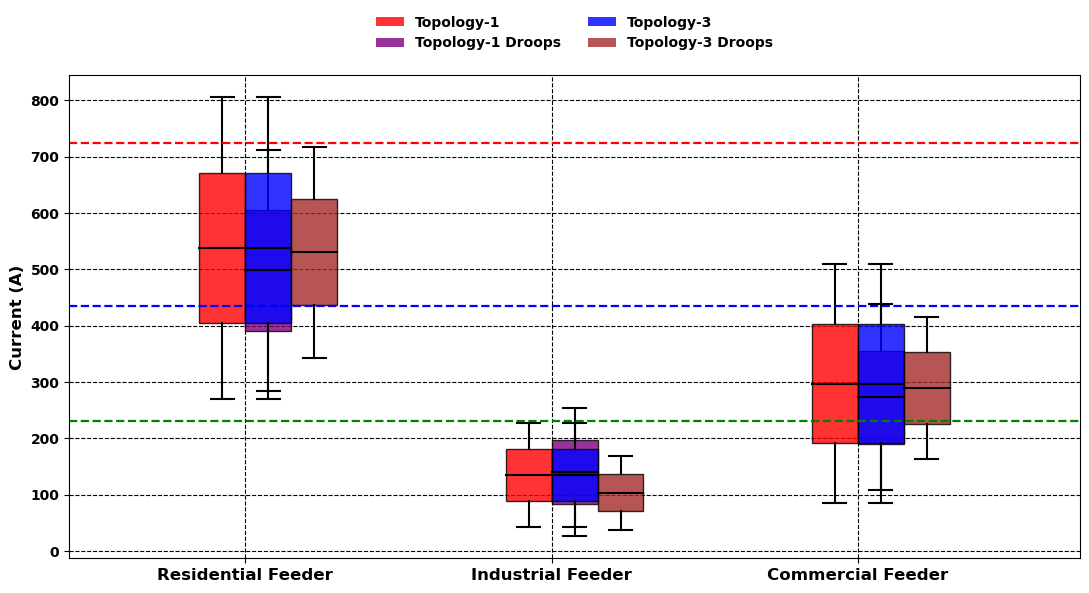

In [4]:
## Box plotting of currents at each feeder just for topology-1 and Topology-3 Droop strategy of case-1
## Feeders: (Residential:res, Industrial:ind and Commercial:com)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Data Loading 
def load_data(feeder_type, topology, case, droop):
    droop_str = "_With_Droop" if droop else "_Without_Droop"
    filename = f'feeder_currents_{feeder_type}_Topology{topology}_case{case}{droop_str}.csv'
    try:
        df = pd.read_csv(filename)
        phase0_data = df[df['Phase'] == 0][['Min Current (A)', 'Max Current (A)']].values.T.flatten().tolist()
        return phase0_data
    except FileNotFoundError:
        print(f"Warning: File {filename} not found. Returning empty data.")
        return []

# Data Preparation 
topologies = [1, 3]  # Changed: Only include topologies 1 and 3
case = 1
feeder_types = ['res', 'ind', 'com']
feeder_labels = {'res': 'Residential Feeder', 'ind': 'Industrial Feeder', 'com': 'Commercial Feeder'}
data_all = {}

for topology in topologies:
    topology_data = {}
    for feeder_type in feeder_types:
        topology_data[feeder_type] = [load_data(feeder_type, topology, case, droop=False),
                                      load_data(feeder_type, topology, case, droop=True)]
    data_all[f'Topology-{topology}'] = topology_data

# Plotting ---
fig, ax = plt.subplots(figsize=(11, 6))

x_labels = feeder_types
x_positions = np.arange(len(x_labels))
width = 0.15

topology_colors = {
    'Topology-1': 'red', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-3_Droops': 'brown'
}

for i, feeder_type in enumerate(feeder_types):
    x_pos = x_positions[i]
    for j, topology in enumerate(topologies): #Only iterates through topologies 1 and 3
        droop_data_without = data_all[f'Topology-{topology}'][feeder_type][0]
        droop_data_with = data_all[f'Topology-{topology}'][feeder_type][1]

        positions_without = [x_pos - width/2 + j * width]  # Adjust positions for only two topologies
        positions_with = [x_pos + width/2 + j * width]    # Adjust positions for only two topologies

        box_without = ax.boxplot(droop_data_without, positions=positions_without, widths=width, patch_artist=True)
        box_with = ax.boxplot(droop_data_with, positions=positions_with, widths=width, patch_artist=True)

        color_without = topology_colors[f'Topology-{topology}']
        color_with = topology_colors[f'Topology-{topology}_Droops']

        plt.setp(box_without['boxes'], color='black', facecolor=color_without, alpha=0.8)
        plt.setp(box_with['boxes'], color='black', facecolor=color_with, alpha=0.8)
        plt.setp(box_without['medians'], color='black', linewidth=1.5)
        plt.setp(box_with['medians'], color='black', linewidth=1.5)
        plt.setp(box_without['caps'], color='black', linewidth=1.5)
        plt.setp(box_with['caps'], color='black', linewidth=1.5)
        plt.setp(box_without['whiskers'], color='black', linewidth=1.5)
        plt.setp(box_with['whiskers'], color='black', linewidth=1.5)
        plt.setp(box_without['fliers'], markeredgecolor='black', markeredgewidth=1.5)
        plt.setp(box_with['fliers'], markeredgecolor='black', markeredgewidth=1.5)

ax.set_xticks(x_positions)
ax.set_xticklabels([feeder_labels[ft] for ft in feeder_types], fontweight='bold', fontsize=12)
ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)

# Legend - 
legend_handles = []
legend_labels = []
for topology in topologies: # Iterates only through topologies 1 and 3
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, fc=topology_colors[f'Topology-{topology}'], alpha=0.8))
    legend_labels.append(f'Topology-{topology}')
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, fc=topology_colors[f'Topology-{topology}_Droops'], alpha=0.8))
    legend_labels.append(f'Topology-{topology} Droops')
ax.legend(legend_handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=False, prop={'weight': 'bold', 'size': 10}) # ncol changed to 2

ax.axhline(y=724, color='red', linestyle='--', linewidth=1.6) # Max Res Current (A) line
ax.axhline(y=434, color='blue', linestyle='--', linewidth=1.6) # Max Ind Current (A) line
ax.axhline(y=231, color='green', linestyle='--', linewidth=1.6) # Max Com Current (A) line

ax.grid(linestyle='--', color='black')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()


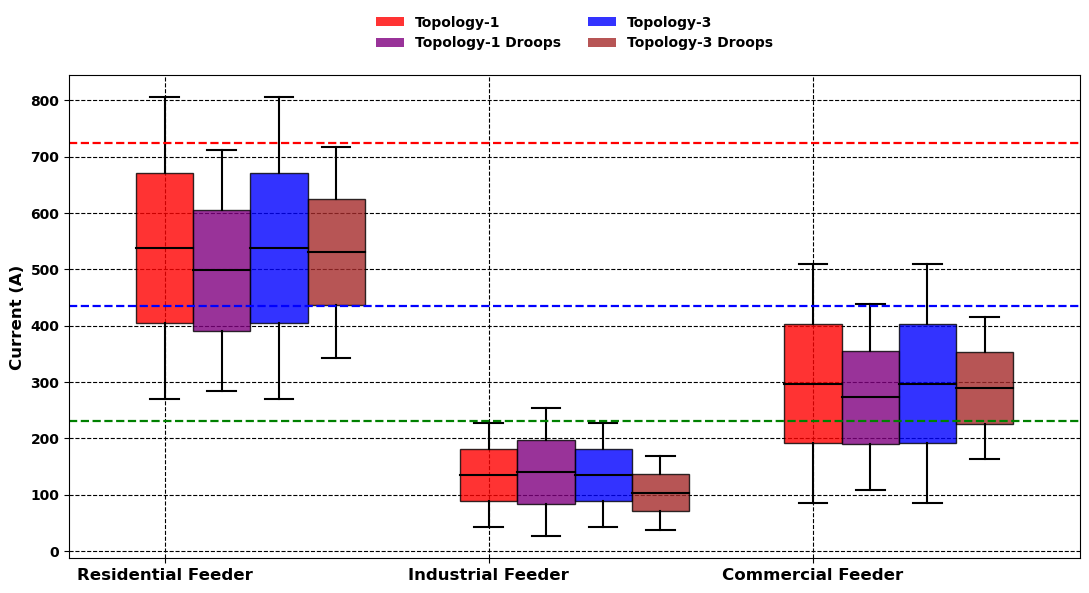

In [7]:
## New Plot, add space and separation
### Box plotting of currents at each feeder just for topology-1 and Topology-3 Droop strategy of case-1
## Feeders: (Residential:res, Industrial:ind and Commercial:com)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Data Loading 
def load_data(feeder_type, topology, case, droop):
    droop_str = "_With_Droop" if droop else "_Without_Droop"
    filename = f'feeder_currents_{feeder_type}_Topology{topology}_case{case}{droop_str}.csv'
    try:
        df = pd.read_csv(filename)
        phase0_data = df[df['Phase'] == 0][['Min Current (A)', 'Max Current (A)']].values.T.flatten().tolist()
        return phase0_data
    except FileNotFoundError:
        print(f"Warning: File {filename} not found. Returning empty data.")
        return []

# Data Preparation 
topologies = [1, 3]  
case = 1
feeder_types = ['res', 'ind', 'com']
feeder_labels = {'res': 'Residential Feeder', 'ind': 'Industrial Feeder', 'com': 'Commercial Feeder'}
data_all = {}

for topology in topologies:
    topology_data = {}
    for feeder_type in feeder_types:
        topology_data[feeder_type] = [load_data(feeder_type, topology, case, droop=False),
                                      load_data(feeder_type, topology, case, droop=True)]
    data_all[f'Topology-{topology}'] = topology_data

# Plotting ---
fig, ax = plt.subplots(figsize=(11, 6)) # Increased figure size

x_labels = feeder_types
num_feeder_types = len(x_labels)
num_topologies = len(topologies)
width = 0.3  # Increased width for better visibility
group_spacing = 0.5 # Added spacing between feeder type groups

x_positions = np.arange(num_feeder_types) * (num_topologies * width * 2 + group_spacing) # Adjust x positions


topology_colors = {
    'Topology-1': 'red', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-3_Droops': 'brown'
}

for i, feeder_type in enumerate(feeder_types):
    x_pos = x_positions[i]
    for j, topology in enumerate(topologies): 
        droop_data_without = data_all[f'Topology-{topology}'][feeder_type][0]
        droop_data_with = data_all[f'Topology-{topology}'][feeder_type][1]

        positions_without = [x_pos + j * width * 2]  # Corrected positions
        positions_with = [x_pos + j * width * 2 + width]    # Corrected positions

        box_without = ax.boxplot(droop_data_without, positions=positions_without, widths=width, patch_artist=True)
        box_with = ax.boxplot(droop_data_with, positions=positions_with, widths=width, patch_artist=True)

        color_without = topology_colors[f'Topology-{topology}']
        color_with = topology_colors[f'Topology-{topology}_Droops']

        plt.setp(box_without['boxes'], color='black', facecolor=color_without, alpha=0.8)
        plt.setp(box_with['boxes'], color='black', facecolor=color_with, alpha=0.8)
        plt.setp(box_without['medians'], color='black', linewidth=1.5)
        plt.setp(box_with['medians'], color='black', linewidth=1.5)
        plt.setp(box_without['caps'], color='black', linewidth=1.5)
        plt.setp(box_with['caps'], color='black', linewidth=1.5)
        plt.setp(box_without['whiskers'], color='black', linewidth=1.5)
        plt.setp(box_with['whiskers'], color='black', linewidth=1.5)
        plt.setp(box_without['fliers'], markeredgecolor='black', markeredgewidth=1.5)
        plt.setp(box_with['fliers'], markeredgecolor='black', markeredgewidth=1.5)


ax.set_xticks(x_positions)
ax.set_xticklabels([feeder_labels[ft] for ft in feeder_types], fontweight='bold', fontsize=12)
ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)

# Legend - 
legend_handles = []
legend_labels = []
for topology in topologies: # Iterates only through topologies 1 and 3
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, fc=topology_colors[f'Topology-{topology}'], alpha=0.8))
    legend_labels.append(f'Topology-{topology}')
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, fc=topology_colors[f'Topology-{topology}_Droops'], alpha=0.8))
    legend_labels.append(f'Topology-{topology} Droops')
ax.legend(legend_handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=False, prop={'weight': 'bold', 'size': 10}) # ncol changed to 2

ax.axhline(y=724, color='red', linestyle='--', linewidth=1.6) # Max Res Current (A) line
ax.axhline(y=434, color='blue', linestyle='--', linewidth=1.6) # Max Ind Current (A) line
ax.axhline(y=231, color='green', linestyle='--', linewidth=1.6) # Max Com Current (A) line

ax.grid(linestyle='--', color='black')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

In [ ]:
## end

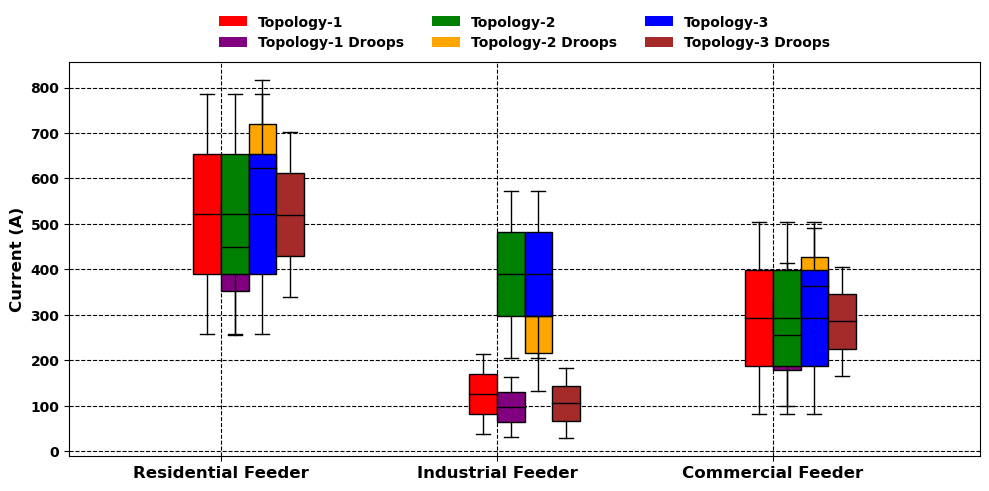

In [3]:
## Ref

## Box plotting of currents at each feeder for all topologies with/without Droop strategy of case-3
## Feeders: (Residential:res, Industrial:ind and Commercial:com)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Data Loading --- Bring the data that we saved.
def load_data(feeder_type, topology, case, droop):
    droop_str = "_With_Droop" if droop else "_Without_Droop"
    filename = f'feeder_currents_{feeder_type}_Topology{topology}_case{case}{droop_str}.csv'
    try:
        df = pd.read_csv(filename)
        phase0_data = df[df['Phase'] == 0][['Min Current (A)', 'Max Current (A)']].values.T.flatten().tolist()
        return phase0_data
    except FileNotFoundError:
        print(f"Warning: File {filename} not found. Returning empty data.")
        return []

# --- Data Preparation --- to have the feeder name and the topologies
topologies = [1, 2, 3]
case = 3  ## Choose the load profile (case 1 or 3) Mustafa A. Kamoona
feeder_types = ['res', 'ind', 'com']
feeder_labels = {'res': 'Residential Feeder', 'ind': 'Industrial Feeder', 'com': 'Commercial Feeder'}
data_all = {}

for topology in topologies:
    topology_data = {}
    for feeder_type in feeder_types:
        topology_data[feeder_type] = [load_data(feeder_type, topology, case, droop=False),
                                      load_data(feeder_type, topology, case, droop=True)]
    data_all[f'Topology-{topology}'] = topology_data

# --- Plotting --- Box type
fig, ax = plt.subplots(figsize=(10, 5))

x_labels = feeder_types
x_positions = np.arange(len(x_labels))
width = 0.1

topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

for i, feeder_type in enumerate(feeder_types):
    x_pos = x_positions[i]
    for j, topology in enumerate(topologies):
        droop_data_without = data_all[f'Topology-{topology}'][feeder_type][0]
        droop_data_with = data_all[f'Topology-{topology}'][feeder_type][1]

        positions_without = [x_pos - width/2 + j * width]
        positions_with = [x_pos + width/2 + j * width]

        box_without = ax.boxplot(droop_data_without, positions=positions_without, widths=width, patch_artist=True)
        box_with = ax.boxplot(droop_data_with, positions=positions_with, widths=width, patch_artist=True)

        color_without = topology_colors[f'Topology-{topology}']
        color_with = topology_colors[f'Topology-{topology}_Droops']

        plt.setp(box_without['boxes'], color='black', facecolor=color_without)
        plt.setp(box_with['boxes'], color='black', facecolor=color_with)
        plt.setp(box_without['medians'], color='black')
        plt.setp(box_with['medians'], color='black')
        plt.setp(box_without['caps'], color='black')
        plt.setp(box_with['caps'], color='black')
        plt.setp(box_without['whiskers'], color='black')
        plt.setp(box_with['whiskers'], color='black')
        plt.setp(box_without['fliers'], markeredgecolor='black')
        plt.setp(box_with['fliers'], markeredgecolor='black')

ax.set_xticks(x_positions)
ax.set_xticklabels([feeder_labels[ft] for ft in feeder_types], fontweight='bold', fontsize=12)
ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)

# Legends - 
legend_handles = []
legend_labels = []
for topology in topologies:
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, fc=topology_colors[f'Topology-{topology}']))
    legend_labels.append(f'Topology-{topology}')
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, fc=topology_colors[f'Topology-{topology}_Droops']))
    legend_labels.append(f'Topology-{topology} Droops')
ax.legend(legend_handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, prop={'weight': 'bold', 'size': 10}) # weight added here

ax.grid(linestyle='--', color='black')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

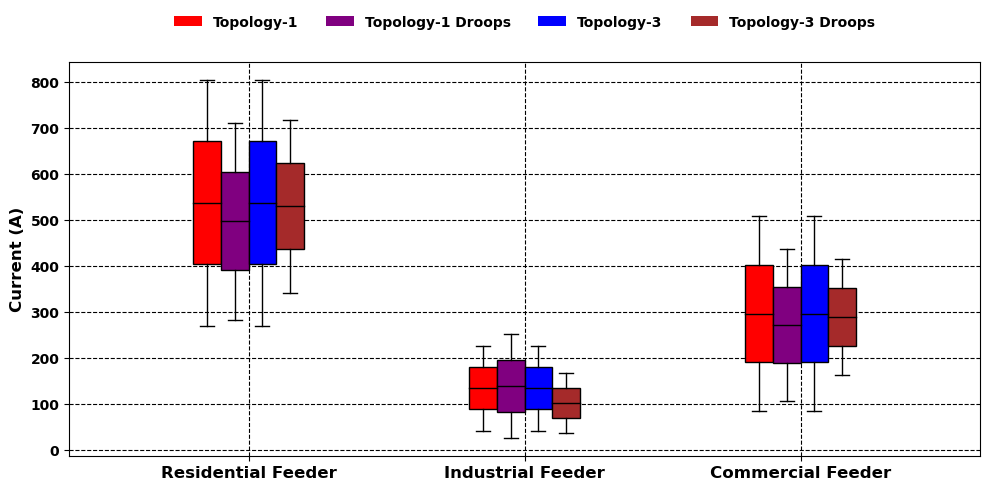

In [4]:
## Ref

## Box plotting of currents at each feeder just for topology-1 and Topology-3 Droop strategy of case-1
## Feeders: (Residential:res, Industrial:ind and Commercial:com)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Loading 
def load_data(feeder_type, topology, case, droop):
    droop_str = "_With_Droop" if droop else "_Without_Droop"
    filename = f'feeder_currents_{feeder_type}_Topology{topology}_case{case}{droop_str}.csv'
    try:
        df = pd.read_csv(filename)
        phase0_data = df[df['Phase'] == 0][['Min Current (A)', 'Max Current (A)']].values.T.flatten().tolist()
        return phase0_data
    except FileNotFoundError:
        print(f"Warning: File {filename} not found. Returning empty data.")
        return []

# Data Preparation 
topologies = [1, 3]
case = 1
feeder_types = ['res', 'ind', 'com']
feeder_labels = {'res': 'Residential Feeder', 'ind': 'Industrial Feeder', 'com': 'Commercial Feeder'}
data_all = {}

for topology in topologies:
    topology_data = {}
    for feeder_type in feeder_types:
        topology_data[feeder_type] = [load_data(feeder_type, topology, case, droop=False),
                                      load_data(feeder_type, topology, case, droop=True)]
    data_all[f'Topology-{topology}'] = topology_data

# --- Plotting ---
fig, ax = plt.subplots(figsize=(10, 5))

x_labels = feeder_types
x_positions = np.arange(len(x_labels))
width = 0.1

topology_colors = {
    1: 'red', 3: 'blue',
    '1_Droops': 'purple', '3_Droops': 'brown'
}

for i, feeder_type in enumerate(feeder_types):
    x_pos = x_positions[i]
    for j, topology in enumerate(topologies):
        droop_data_without = data_all[f'Topology-{topology}'][feeder_type][0]
        droop_data_with = data_all[f'Topology-{topology}'][feeder_type][1]

        positions_without = [x_pos - width * 1.5 + j * width * 2]
        positions_with = [x_pos - width * 0.5 + j * width * 2]


        box_without = ax.boxplot(droop_data_without, positions=positions_without, widths=width, patch_artist=True)
        box_with = ax.boxplot(droop_data_with, positions=positions_with, widths=width, patch_artist=True)

        color_without = topology_colors[topology]
        color_with = topology_colors[f'{topology}_Droops']

        plt.setp(box_without['boxes'], color='black', facecolor=color_without)
        plt.setp(box_with['boxes'], color='black', facecolor=color_with)
        plt.setp(box_without['medians'], color='black')
        plt.setp(box_with['medians'], color='black')
        plt.setp(box_without['caps'], color='black')
        plt.setp(box_with['caps'], color='black')
        plt.setp(box_without['whiskers'], color='black')
        plt.setp(box_with['whiskers'], color='black')
        plt.setp(box_without['fliers'], markeredgecolor='black')
        plt.setp(box_with['fliers'], markeredgecolor='black')

ax.set_xticks(x_positions)
ax.set_xticklabels([feeder_labels[ft] for ft in feeder_types], fontweight='bold', fontsize=12)
ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)

# Legend 
legend_handles = []
legend_labels = []
for topology in topologies:
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, fc=topology_colors[topology]))
    legend_labels.append(f'Topology-{topology}')
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, fc=topology_colors[f'{topology}_Droops']))
    legend_labels.append(f'Topology-{topology} Droops')
ax.legend(legend_handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, frameon=False, prop={'weight': 'bold', 'size': 10})

ax.grid(linestyle='--', color='black')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

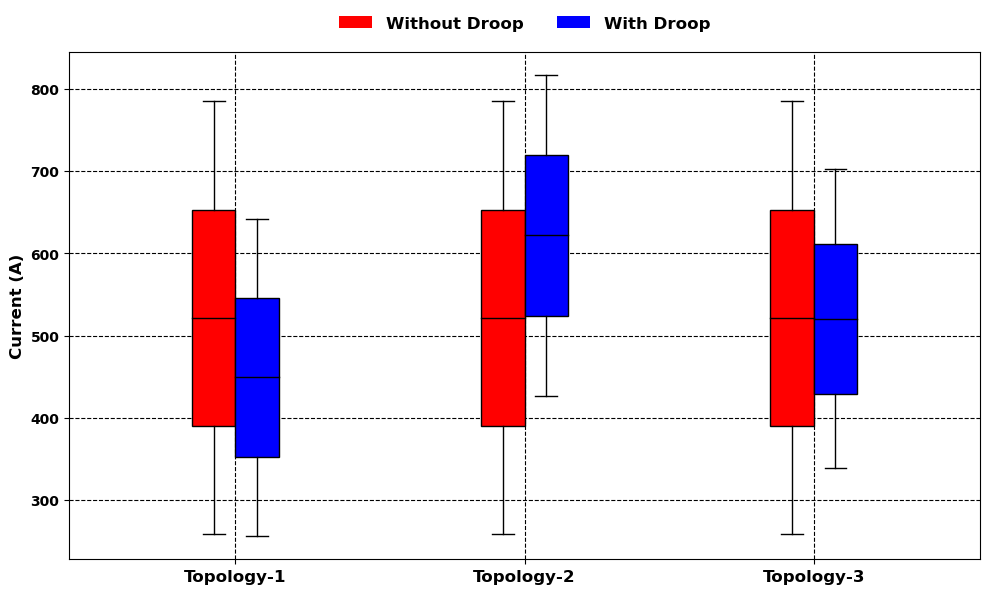

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Data Loading --- from the csv file
def load_data(topology, case, droop):
    droop_str = "_With_Droop" if droop else "_Without_Droop"
    filename = f'feeder_currents_res_Topology{topology}_case{case}{droop_str}.csv'
    try:
        df = pd.read_csv(filename)
        phase0_data = df[df['Phase'] == 0][['Min Current (A)', 'Max Current (A)']].values.T.flatten().tolist()
        return phase0_data
    except FileNotFoundError:
        print(f"Warning: File {filename} not found. Returning empty data.")
        return []

# --- Data Preparation ---
topologies = [1, 2, 3]
case = 3
data_all = {}
for topology in topologies:
    data_all[f'Topology-{topology}'] = [load_data(topology, case, droop=False), load_data(topology, case, droop=True)]

# --- Plotting ---
fig, ax = plt.subplots(figsize=(10, 6))

x_labels = [f'Topology-{i}' for i in topologies]
x_positions = np.arange(len(x_labels))
width = 0.15

colors = ['red', 'blue']
labels = ['Without Droop', 'With Droop']

for i, topology_label in enumerate(x_labels):
    data = data_all[topology_label]
    for j, (droop_data, color, label) in enumerate(zip(data, colors, labels)):
        positions = [x_positions[i] - width/2 + j*width]
        box = ax.boxplot(droop_data, positions=positions, widths=width, patch_artist=True)
        plt.setp(box['boxes'], color='black', facecolor=color)
        plt.setp(box['medians'], color='black')
        plt.setp(box['caps'], color='black')
        plt.setp(box['whiskers'], color='black')
        plt.setp(box['fliers'], markeredgecolor='black')

ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels, fontweight='bold', fontsize=12)
ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)

# Legend adjustments
handles = [plt.Rectangle((0, 0), 1, 1, fc=color) for color in colors]
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(labels), frameon=False, prop={'size': 12, 'weight': 'bold'})

ax.grid(linestyle='--', color='black')

# Make y-axis labels bold
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

In [ ]:
### End

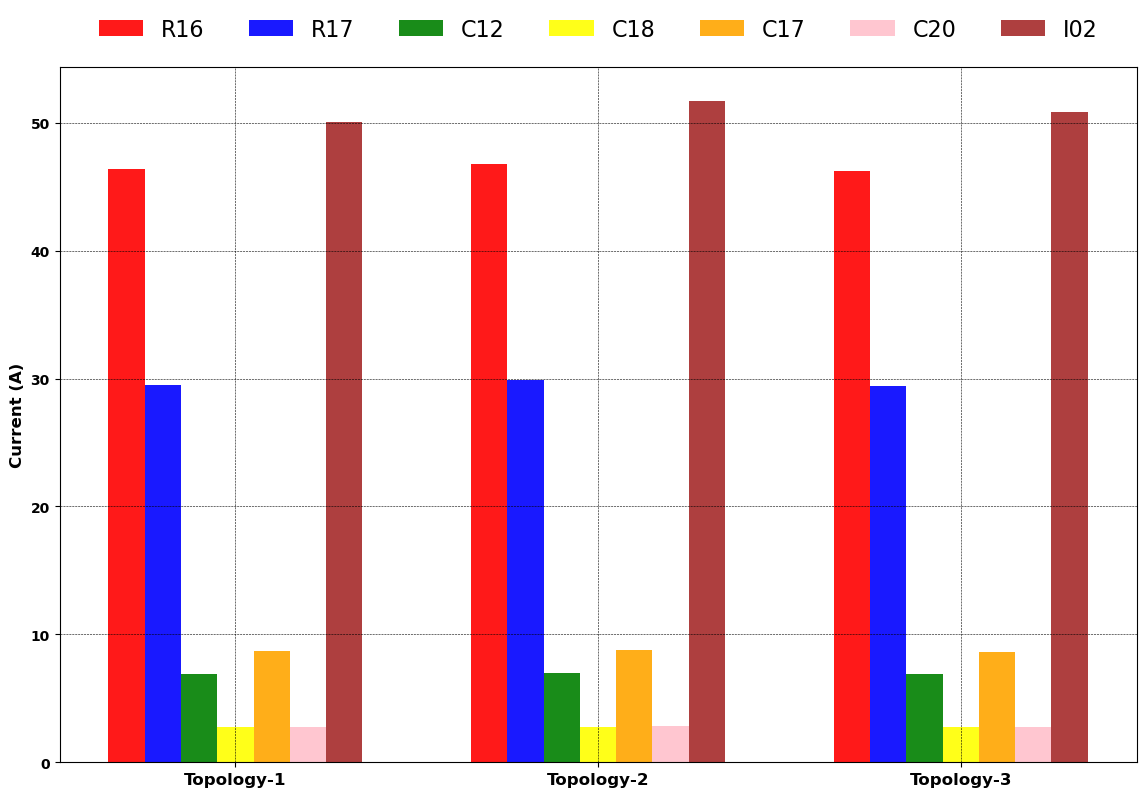

In [8]:
### Current at different Topologies With Droop, Case-3, Phase-A

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to read data from CSV files, handling errors
def read_current_data(filename, selected_buses):
    try:
        df = pd.read_csv(filename)
        # Filter data to include only selected buses
        df = df[df['Bus'].isin(selected_buses)]
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{filename}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse file '{filename}'. Check the file format.")
        return None
    except KeyError:
        print(f"Error: 'Bus' column not found in '{filename}'.")
        return None


# Define file paths for each topology
topology_files = {
    'Topology-1': 'Current_phase_a_output_With_Droop_Topology1_case3.csv',
    'Topology-2': 'Current_phase_a_output_With_Droop_Topology2.csv',
    'Topology-3': 'Current_phase_a_output_With_Droop_Topology3_case3.csv',
}

# Selected buses
selected_buses = ['R16', 'R17', 'C12', 'C18', 'C17', 'C20', 'I02']

# Bus colors
bus_colors = {
    'R16': 'red',
    'R17': 'blue',
    'C12': 'green',
    'C18': 'yellow',
    'C17': 'orange',
    'C20': 'pink',
    'I02': 'brown'
}

# Read and process data for all topologies
topology_data = {}
for topology, filename in topology_files.items():
    df = read_current_data(filename, selected_buses)
    if df is None:
        continue  # Skip to the next topology if there's an error

    topology_data[topology] = {}
    for bus in selected_buses:
        current = df[df['Bus'] == bus]['Phase A Current (A)'].iloc[0]
        topology_data[topology][bus] = current

# Plotting section
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.1
x_positions = np.arange(len(topology_data))

handles = []
labels = []

for i, (topology, bus_currents) in enumerate(topology_data.items()):
    for j, (bus, current) in enumerate(bus_currents.items()):
        bar = ax.bar(x_positions[i] + j * bar_width, current, bar_width,
                     color=bus_colors[bus], alpha=0.9, label=bus if i == 0 else None)
        if i == 0:
            handles.append(bar)
            labels.append(bus)

ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)
ax.set_xticks(x_positions + bar_width * (len(selected_buses) -1) / 2)
ax.set_xticklabels(topology_data.keys(), fontweight='bold', fontsize=12)

# Legend customization
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(selected_buses), frameon=False, prop={'size': 16})

ax.grid(True, which='both', linestyle='--', linewidth=0.4, color='black')

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

plt.tight_layout()
plt.show()

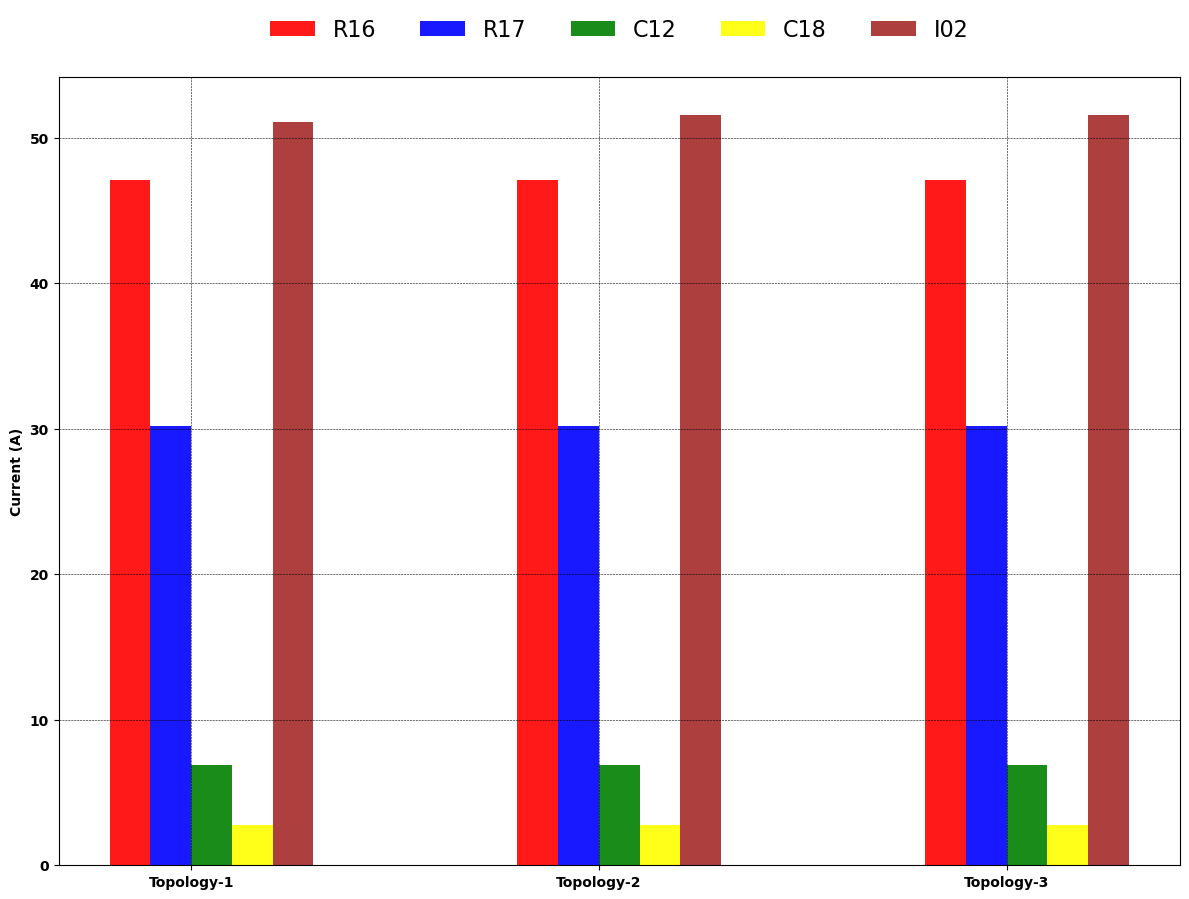

In [7]:
### Current at different Topologies Without Droop, Case-3, Phase-A

import matplotlib.pyplot as plt
import numpy as np

#################  R16     R17     C12    C18    I02       
topology_data = {
    'Topology-1': [47.078, 30.201, 6.924, 2.760, 51.082],
    'Topology-2': [47.078, 30.201, 6.924, 2.760, 51.585],
    'Topology-3': [47.078, 30.201, 6.924, 2.760, 51.585]
}

bus_colors = {
    'R16': 'red',
    'R17': 'blue',
    'C12': 'green',
    'C18': 'yellow',
    'I02': 'brown'
}

fig, ax = plt.subplots(figsize=(12, 9))
bar_width = 0.1
x_positions = np.arange(len(topology_data))

handles = []
labels = []

for i, (topology, measurements) in enumerate(topology_data.items()):
    for j, measurement in enumerate(measurements):
        bus_key = list(bus_colors.keys())[j]
        bar = ax.bar(x_positions[i] + j * bar_width, measurement, bar_width, color=bus_colors[bus_key], alpha=0.9)
        if i == 0:
            handles.append(bar)
            labels.append(bus_key)


ax.set_ylabel('Current (A)', fontweight='bold')
ax.set_xticks(x_positions + bar_width * 1.5)
ax.set_xticklabels(topology_data.keys(), fontweight='bold')

# Legend customization:  Moved to the top, with larger font size
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(bus_colors), frameon=False, prop={'size': 16}) #Increased font size here


ax.grid(True, which='both', linestyle='--', linewidth=0.4, color='black')

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

plt.tight_layout()
plt.show()

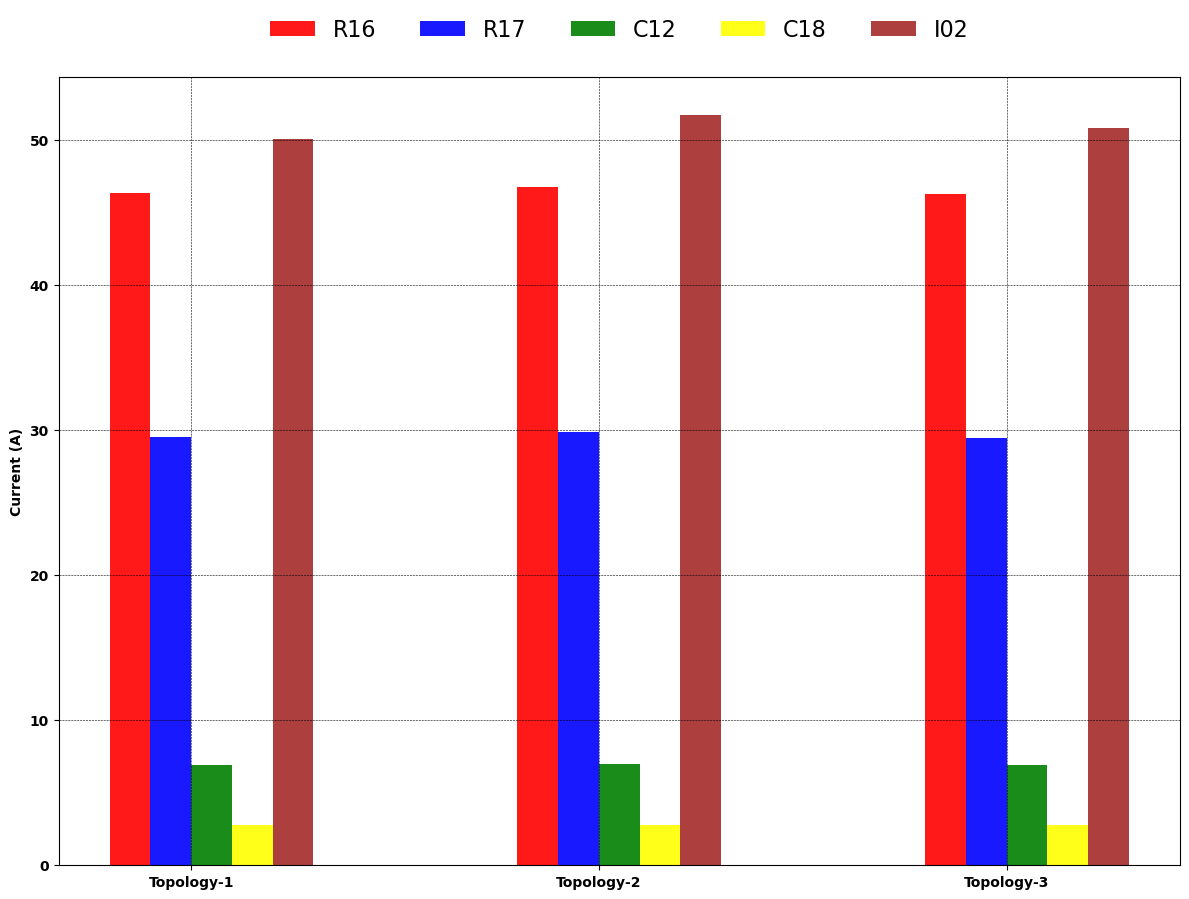

In [4]:
### Current at different Topologies With Droop, Case-3, Phase-A

import matplotlib.pyplot as plt
import numpy as np

#################  R16     R17     C12    C18    I02       
topology_data = {
    'Topology-1': [46.364, 29.486, 6.926, 2.760, 50.048],
    'Topology-2': [46.749, 29.886, 7.010, 2.792, 51.733],
    'Topology-3': [46.259, 29.450, 6.882, 2.748, 50.803]
}

bus_colors = {
    'R16': 'red',
    'R17': 'blue',
    'C12': 'green',
    'C18': 'yellow',
    'I02': 'brown'
}

fig, ax = plt.subplots(figsize=(12, 9))
bar_width = 0.1
x_positions = np.arange(len(topology_data))

handles = []
labels = []

for i, (topology, measurements) in enumerate(topology_data.items()):
    for j, measurement in enumerate(measurements):
        bus_key = list(bus_colors.keys())[j]
        bar = ax.bar(x_positions[i] + j * bar_width, measurement, bar_width, color=bus_colors[bus_key], alpha=0.9)
        if i == 0:
            handles.append(bar)
            labels.append(bus_key)


ax.set_ylabel('Current (A)', fontweight='bold')
ax.set_xticks(x_positions + bar_width * 1.5)
ax.set_xticklabels(topology_data.keys(), fontweight='bold')

# Legend customization:  Moved to the top, with larger font size
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(bus_colors), frameon=False, prop={'size': 16}) #Increased font size here


ax.grid(True, which='both', linestyle='--', linewidth=0.4, color='black')

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

plt.tight_layout()
plt.show()

In [ ]:
## Current without Droop, bar figure

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to read data from CSV files
def read_current_data(filename):
    try:
        df = pd.read_csv(filename)
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{filename}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse file '{filename}'. Check the file format.")
        return None


# Read data from CSV files. Include error handling.
phase_a_data = read_current_data('Current_phase_a_output_Without_Droop_Topology2.csv')
phase_b_data = read_current_data('Current_phase_b_output_Without_Droop_Topology2.csv')

# Check if any of the files failed to load
if phase_a_data is None or phase_b_data is None:
    print("Could not load all necessary CSV files. Exiting.")
    exit()


# Dictionary to consolidate data from all phases for each bus.
bus_data = {}
for index, row in phase_a_data.iterrows():
    bus = row['Bus']
    bus_data[bus] = [row['Phase A Current (A)'], 0]  # Initialize with zero for phase B

for index, row in phase_b_data.iterrows():
    bus = row['Bus']
    if bus in bus_data:
        bus_data[bus][1] = row['Phase B Current (A)']


# Select the buses you want to plot. Adjust as needed.
selected_buses = ['R16', 'R17', 'C12', 'C18', 'C17', 'C20', 'I02']
plot_data = {bus: data for bus, data in bus_data.items() if bus in selected_buses}

# Define a dictionary to map bus names to colors
bus_colors = {
    'R16': 'red',
    'R17': 'blue',
    'C12': 'green',
    'C18': 'yellow',
    'C17': 'orange',
    'C20': 'pink',
    'I02': 'brown'
}

# Plotting section
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.15
x_positions = np.arange(len(plot_data))

handles = []
labels = []

for i, (bus, currents) in enumerate(plot_data.items()):
    num_phases = len(currents)
    color = bus_colors.get(bus, 'gray')

    bars = ax.bar(x_positions[i] + np.arange(num_phases) * bar_width, currents, bar_width,
                  label=bus, alpha=0.9, color=color, edgecolor='black', linewidth=1)
    handles.append(bars[0])
    labels.append(bus)

ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)

# Dynamically set xticks and labels.
xticks = []
xticklabels = []
for i in range(len(plot_data)):
    xticks.extend([x_positions[i] + bar_width * j for j in range(2)])
    xticklabels.extend(['A', 'B'])

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontweight='bold', fontsize=12)
ax.tick_params(axis='x', which='major', pad=15)

ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(plot_data), frameon=False,
          prop={'size': 12})
ax.grid(True, which='both', linestyle='--', linewidth=0.4, color='black')

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

plt.tight_layout()
plt.show()

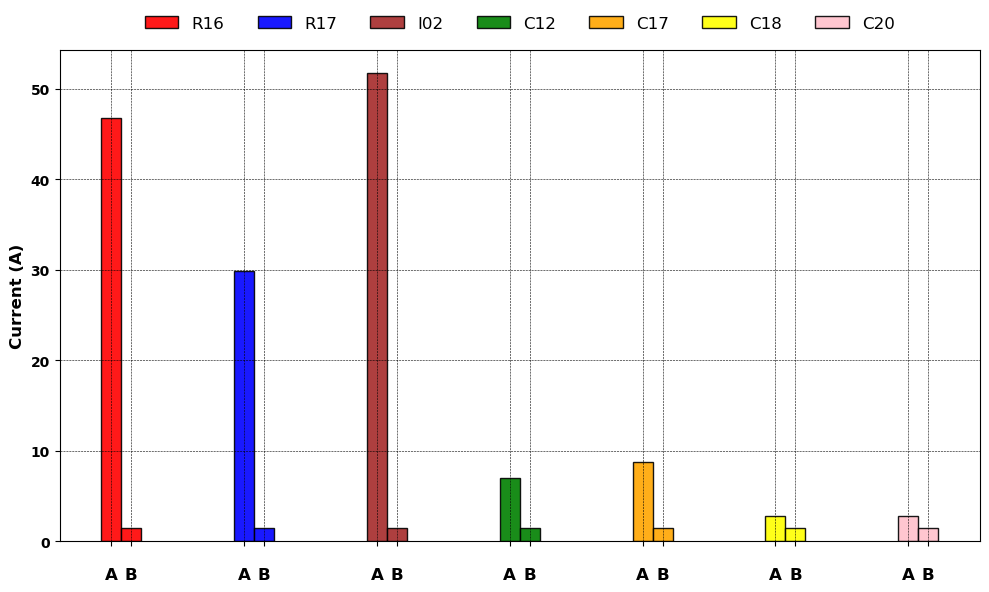

In [40]:
## Current with Droop, bar figure

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to read data from CSV files
def read_current_data(filename):
    try:
        df = pd.read_csv(filename)
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{filename}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse file '{filename}'. Check the file format.")
        return None


# Read data from CSV files. Include error handling.
phase_a_data = read_current_data('Current_phase_a_output_With_Droop_Topology2.csv')
phase_b_data = read_current_data('Current_phase_b_output_With_Droop_Topology2.csv')

# Check if any of the files failed to load
if phase_a_data is None or phase_b_data is None:
    print("Could not load all necessary CSV files. Exiting.")
    exit()


# Create a dictionary to consolidate data from all phases for each bus.
bus_data = {}
for index, row in phase_a_data.iterrows():
    bus = row['Bus']
    bus_data[bus] = [row['Phase A Current (A)'], 0]

for index, row in phase_b_data.iterrows():
    bus = row['Bus']
    if bus in bus_data:
        bus_data[bus][1] = row['Phase B Current (A)']


# Select the buses you want to plot. Adjust as needed.
selected_buses = ['R16', 'R17', 'C12', 'C18', 'C17', 'C20', 'I02']
plot_data = {bus: data for bus, data in bus_data.items() if bus in selected_buses}

# Define a dictionary to map bus names to colors
bus_colors = {
    'R16': 'red',
    'R17': 'blue',
    'C12': 'green',
    'C18': 'yellow',
    'C17': 'orange',
    'C20': 'pink',
    'I02': 'brown'
}

# Plotting section
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.15
x_positions = np.arange(len(plot_data))

handles = []
labels = []

for i, (bus, currents) in enumerate(plot_data.items()):
    num_phases = len(currents) 
    color = bus_colors.get(bus, 'gray')

    bars = ax.bar(x_positions[i] + np.arange(num_phases) * bar_width, currents, bar_width,
                  label=bus, alpha=0.9, color=color, edgecolor='black', linewidth=1)
    handles.append(bars[0])
    labels.append(bus)

ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)

# Dynamically set xticks and labels.
xticks = []
xticklabels = []
for i in range(len(plot_data)):
    xticks.extend([x_positions[i] + bar_width * j for j in range(2)])
    xticklabels.extend(['A', 'B']) #only A and B

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontweight='bold', fontsize=12)
ax.tick_params(axis='x', which='major', pad=15)

ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(plot_data), frameon=False,
          prop={'size': 12})
ax.grid(True, which='both', linestyle='--', linewidth=0.4, color='black')

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

plt.tight_layout()
plt.show()

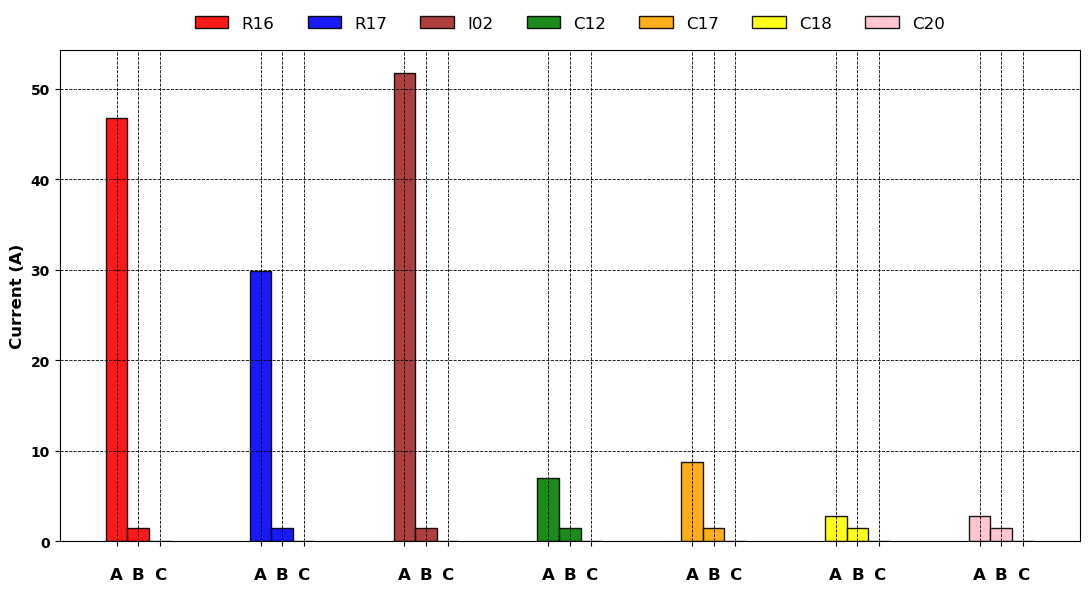

In [44]:
## Current with Droop phase A&B, neutral C later we can make it (N), bar figure

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to read data from CSV files
def read_current_data(filename):
    try:
        df = pd.read_csv(filename)
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{filename}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse file '{filename}'. Check the file format.")
        return None


# Read data from CSV files.
phase_a_data = read_current_data('Current_phase_a_output_With_Droop_Topology2.csv')
phase_b_data = read_current_data('Current_phase_b_output_With_Droop_Topology2.csv')
phase_c_data = read_current_data('Current_phase_c_output_With_Droop_Topology2.csv')

# Check if any of the files failed to load
if phase_a_data is None or phase_b_data is None or phase_c_data is None:
    print("Could not load all necessary CSV files. Exiting.")
    exit()


# Create a dictionary to consolidate data from all phases for each bus
bus_data = {}
for index, row in phase_a_data.iterrows():
    bus = row['Bus']  # CSV has a 'Bus' column
    bus_data[bus] = [row['Phase A Current (A)'], 0, 0]  # Initialize with zeros for phases B and C

for index, row in phase_b_data.iterrows():
    bus = row['Bus']
    if bus in bus_data:
        bus_data[bus][1] = row['Phase B Current (A)']

for index, row in phase_c_data.iterrows():
    bus = row['Bus']
    if bus in bus_data:
        bus_data[bus][2] = row['Phase C Current (A)']

# Select the buses you want to plot. Adjust as needed.
selected_buses = ['R16', 'R17', 'C12', 'C18', 'C17', 'C20', 'I02']   # Example
plot_data = {bus: data for bus, data in bus_data.items() if bus in selected_buses}

# Define a dictionary to map bus names to colors
bus_colors = {
    'R16': 'red',
    'R17': 'blue',
    'C12': 'green',
    'C18': 'yellow',
    'C17': 'orange',
    'C20': 'pink',
    'I02': 'brown'
}

# Plotting section
fig, ax = plt.subplots(figsize=(11, 6))
bar_width = 0.15
x_positions = np.arange(len(plot_data))

handles = []
labels = []

for i, (bus, currents) in enumerate(plot_data.items()):
    num_phases = len(currents)
    color = bus_colors.get(bus, 'gray')

    bars = ax.bar(x_positions[i] + np.arange(num_phases) * bar_width, currents, bar_width,
                  label=bus, alpha=0.9, color=color, edgecolor='black', linewidth=1)
    handles.append(bars[0])
    labels.append(bus)

ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)

# Dynamically set xticks and labels
xticks = []
xticklabels = []
for i in range(len(plot_data)):
    num_phases = len(list(plot_data.values())[i])
    xticks.extend([x_positions[i] + bar_width * j for j in range(num_phases)])
    xticklabels.extend([chr(65 + j) for j in range(num_phases)])

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontweight='bold', fontsize=12)
ax.tick_params(axis='x', which='major', pad=15)

ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(plot_data), frameon=False,
          prop={'size': 12})
ax.grid(True, which='both', linestyle='--', linewidth=0.6, color='black')

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

plt.tight_layout()
plt.show()

In [ ]:
### End

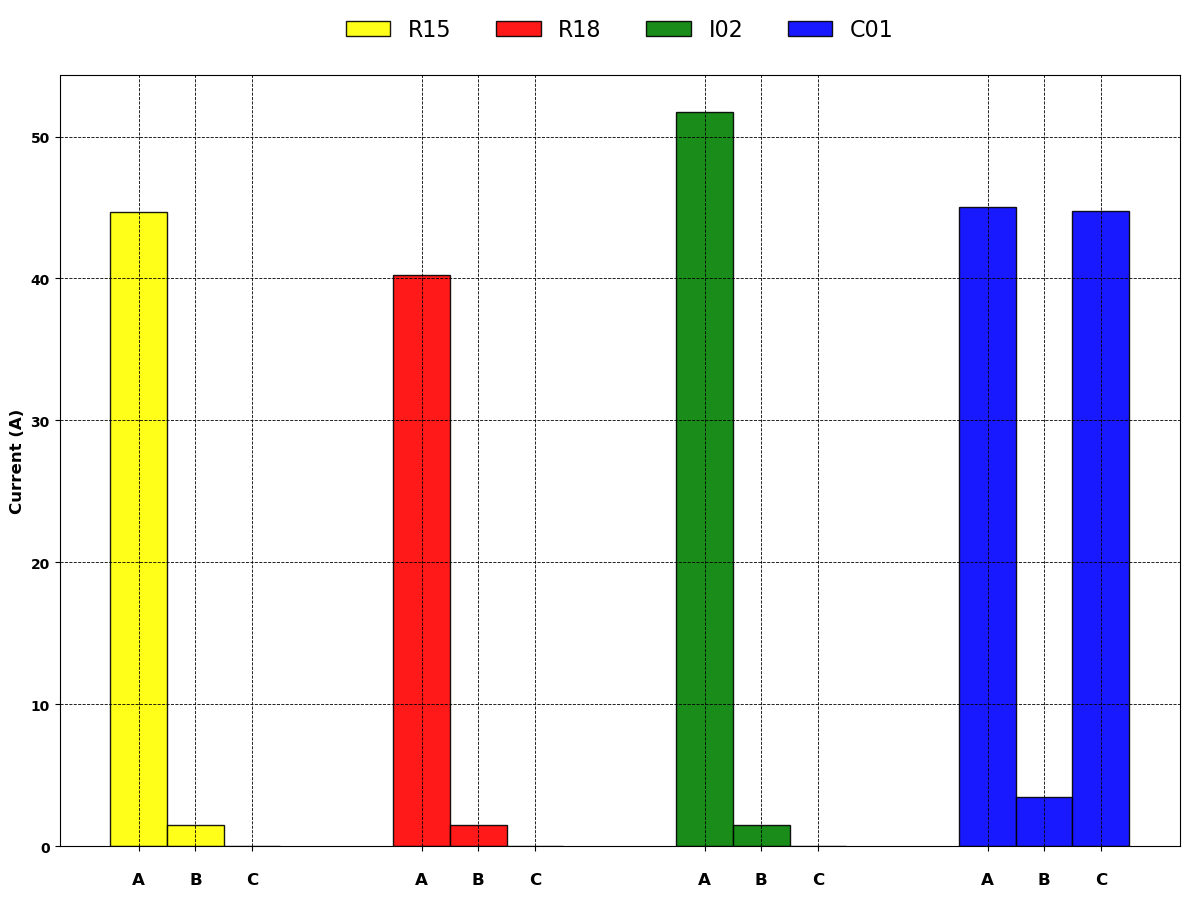

In [30]:
## Current with Droop phase A&B, neutral C, bar figure

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to read data from CSV files
def read_current_data(filename):
    try:
        df = pd.read_csv(filename)
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{filename}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse file '{filename}'. Check the file format.")
        return None


# Read data from CSV files. Include error handling.
phase_a_data = read_current_data('Current_phase_a_output_With_Droop_Topology2.csv')
phase_b_data = read_current_data('Current_phase_b_output_With_Droop_Topology2.csv')
phase_c_data = read_current_data('Current_phase_c_output_With_Droop_Topology2.csv')

# Check if any of the files failed to load
if phase_a_data is None or phase_b_data is None or phase_c_data is None:
    print("Could not load all necessary CSV files. Exiting.")
    exit()


# Create a dictionary to consolidate data from all phases for each bus
bus_data = {}
for index, row in phase_a_data.iterrows():
    bus = row['Bus']  # Assumes your CSV has a 'Bus' column
    bus_data[bus] = [row['Phase A Current (A)'], 0, 0]  # Initialize with zeros for phases B and C

for index, row in phase_b_data.iterrows():
    bus = row['Bus']
    if bus in bus_data:
        bus_data[bus][1] = row['Phase B Current (A)']

for index, row in phase_c_data.iterrows():
    bus = row['Bus']
    if bus in bus_data:
        bus_data[bus][2] = row['Phase C Current (A)']

# Select the buses you want to plot. Adjust as needed.
selected_buses = ['R18', 'C01', 'I02', 'R15']  # Example
plot_data = {bus: data for bus, data in bus_data.items() if bus in selected_buses}

# Define a dictionary to map bus names to colors
bus_colors = {
    'R18': 'red',
    'C01': 'blue',
    'I02': 'green',
    'R15': 'yellow'
}

# Plotting section
fig, ax = plt.subplots(figsize=(12, 9))
bar_width = 0.2
x_positions = np.arange(len(plot_data))

handles = []
labels = []

for i, (bus, currents) in enumerate(plot_data.items()):
    num_phases = len(currents)
    color = bus_colors.get(bus, 'gray')

    bars = ax.bar(x_positions[i] + np.arange(num_phases) * bar_width, currents, bar_width,
                  label=bus, alpha=0.9, color=color, edgecolor='black', linewidth=1)
    handles.append(bars[0])
    labels.append(bus)

ax.set_ylabel('Current (A)', fontweight='bold', fontsize=12)

# Dynamically set xticks and labels
xticks = []
xticklabels = []
for i in range(len(plot_data)):
    num_phases = len(list(plot_data.values())[i])
    xticks.extend([x_positions[i] + bar_width * j for j in range(num_phases)])
    xticklabels.extend([chr(65 + j) for j in range(num_phases)])

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontweight='bold', fontsize=12)
ax.tick_params(axis='x', which='major', pad=15)

ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(plot_data), frameon=False,
          prop={'size': 16})
ax.grid(True, which='both', linestyle='--', linewidth=0.6, color='black')

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

plt.tight_layout()
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_25292\3130637789.py:54: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontweight('bold')


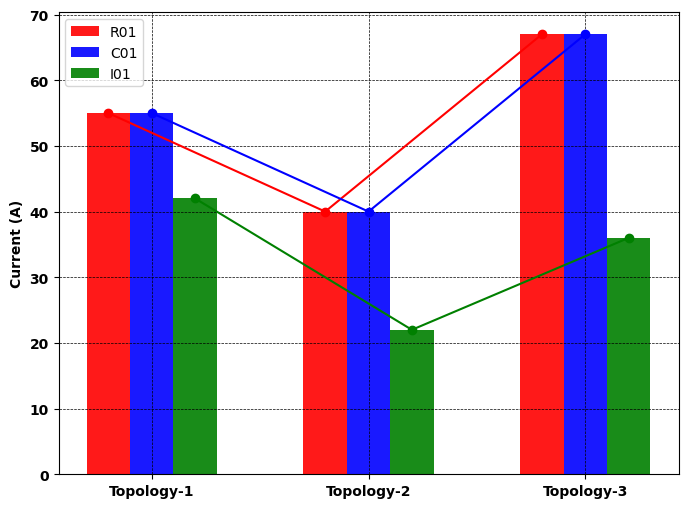

In [45]:
import matplotlib.pyplot as plt
import numpy as np

bus_data = {
    'R01': [55, 40, 67],
    'C01': [55, 40, 67],
    'I01': [42, 22, 36]
}

topology_colors = {'Topology-1': 'red', 'Topology-2': 'blue', 'Topology-3': 'green'}

bus_topology_mapping = {
    'R01': 'Topology-1',
    'C01': 'Topology-2',
    'I01': 'Topology-3'
}

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.2
index = np.arange(len(bus_data))

bar_info = {}

for i, (bus, currents) in enumerate(bus_data.items()):
    topology_name = bus_topology_mapping.get(bus)
    if topology_name:
        color = topology_colors.get(topology_name, 'gray')
        bars = ax.bar(index + i * bar_width, currents, bar_width, label=bus, color=color, alpha=0.9)
        bar_info[bus] = bars
    else:
        print(f"Topology not found for {bus}. Defaulting to 'gray' color.")
        bars = ax.bar(index + i * bar_width, currents, bar_width, label=bus, color='gray', alpha=0.9)
        bar_info[bus] = bars

#ax.set_xlabel('Topologies', fontweight='bold')
ax.set_ylabel('Current (A)', fontweight='bold')
ax.set_xticks(index + 0.2)
ax.set_xticklabels(['Topology-1', 'Topology-2', 'Topology-3'], fontweight='bold') # X-axis numbers bold

ax.legend()

ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='black')

for bus, bars in bar_info.items():
    topology_name = bus_topology_mapping.get(bus)
    color = topology_colors.get(topology_name, 'gray')
    x_coords = [rect.get_x() + rect.get_width()/2 for rect in bars]
    y_coords = [rect.get_height() for rect in bars]
    ax.plot(x_coords, y_coords, marker='o', linestyle='-', color=color, label=f'{bus} Line')

#Make y-axis numbers bold
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontweight('bold')

plt.show()

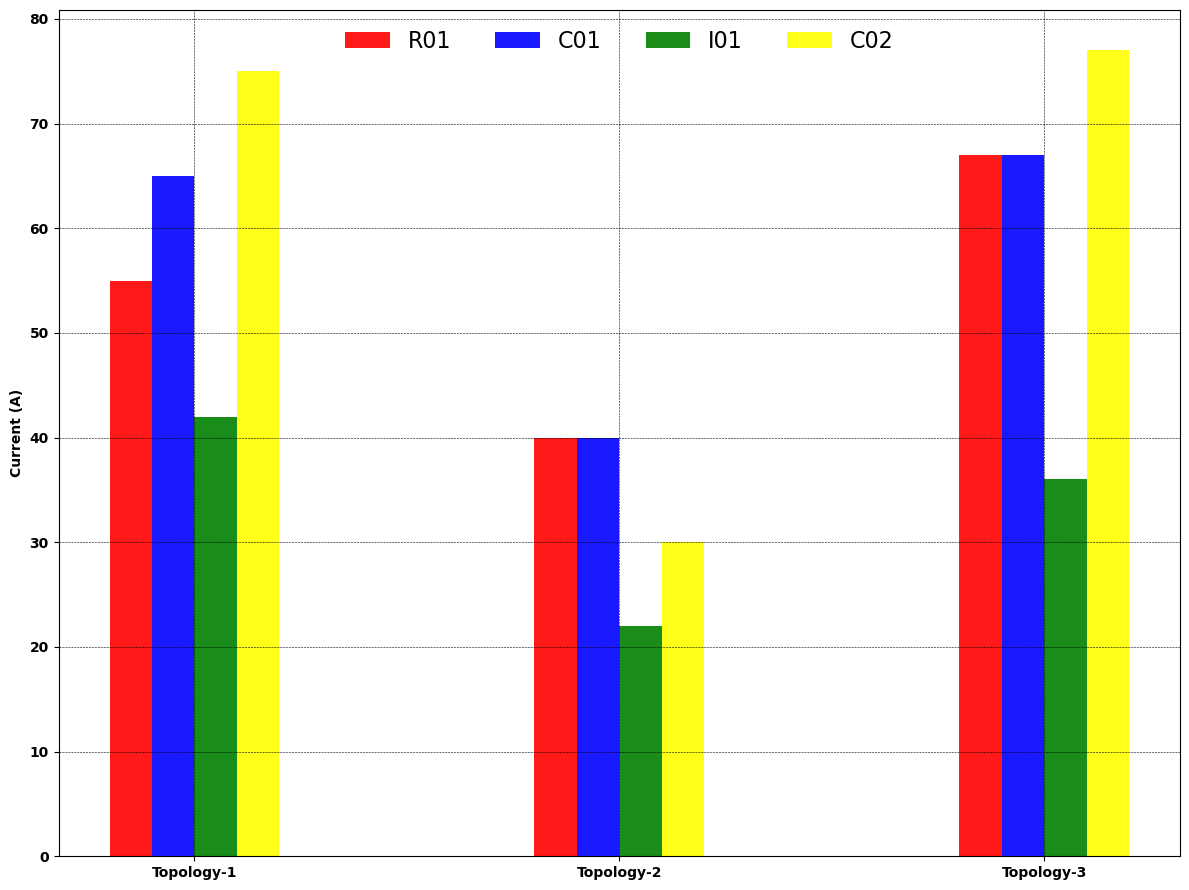

In [46]:
import matplotlib.pyplot as plt
import numpy as np

topology_data = {
    'Topology-1': [55, 65, 42, 75],
    'Topology-2': [40, 40, 22, 30],
    'Topology-3': [67, 67, 36, 77]
}

bus_colors = {
    'R01': 'red',
    'C01': 'blue',
    'I01': 'green',
    'C02': 'yellow'
}

fig, ax = plt.subplots(figsize=(12, 9))
bar_width = 0.1
x_positions = np.arange(len(topology_data))

handles = []
labels = []

for i, (topology, measurements) in enumerate(topology_data.items()):
    for j, measurement in enumerate(measurements):
        bus_key = list(bus_colors.keys())[j]
        bar = ax.bar(x_positions[i] + j * bar_width, measurement, bar_width, color=bus_colors[bus_key], alpha=0.9)
        if i == 0:
            handles.append(bar)
            labels.append(bus_key)


ax.set_ylabel('Current (A)', fontweight='bold')
ax.set_xticks(x_positions + bar_width * 1.5)
ax.set_xticklabels(topology_data.keys(), fontweight='bold')

# Legend customization:  Moved to the top, with larger font size
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=len(bus_colors), frameon=False, prop={'size': 16}) #Increased font size here


ax.grid(True, which='both', linestyle='--', linewidth=0.4, color='black')

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

plt.tight_layout()
plt.show()